## Метод наименьших квадратов

Коэффициенты многочлена степени 1: [-4.56262822  3.10566094], невязка: 472.85
Коэффициенты многочлена степени 2: [-0.38391489 -1.95996297  1.01312478], невязка: 102.02
Коэффициенты многочлена степени 3: [-2.07714141  2.20887258 -1.08180218  0.2793236 ], невязка: 55.84
Изменение невязки (1 -> 2): -370.83
Изменение невязки (2 -> 3): -46.18


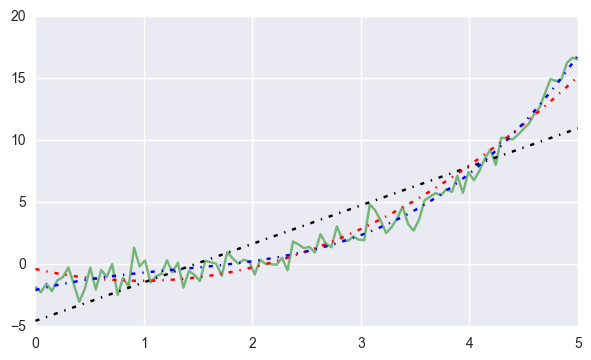

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (7.0, 4.0)
seaborn.mpl.rcParams['savefig.dpi'] = 100

import pandas as pd
import numpy as np

# Читаем данные из файла

df = pd.read_csv("data/ls_data.csv", sep=";", index_col=[0]).transpose().reset_index().astype(float)
data_matrix = df.as_matrix()
x = data_matrix[0:, 0]
y = data_matrix[0:, 1]

size = data_matrix.shape[0]

def create_basis(n, x):
    return [x ** i for i in range(n + 1)]

# реализуем несколько вспомогательных функций

def gramian(basis):
    size = len(basis)
    gramian = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            gramian[i, j] = np.dot(basis[i], basis[j].T)
    return gramian
    
def products(y, basis):
    size = len(basis)
    products = np.zeros(size)
    for i in range(size):
        products[i] = np.dot(y, basis[i].T)
    return products

def predict(weights, basis):
    prediction = 0
    for i in range(len(weights)):
        prediction += weights[i] * basis[i]
    return prediction

def create_model_and_predict(x, y, n):
    basis = create_basis(n, x)
    G = gramian(basis)
    b = products(y, basis)
    weights = np.linalg.solve(G, b)
    y_hat = predict(weights, basis)
    return y_hat, weights, (y - y_hat).dot((y - y_hat).T)

# Используя МНК построим модель для наших данных в виде многочленов второй и третей степени

y_hat_1, weights_1, err_1 = create_model_and_predict(x, y, 1)
y_hat_2, weights_2, err_2 = create_model_and_predict(x, y, 2)
y_hat_3, weights_3, err_3 = create_model_and_predict(x, y, 3)

dataPlot = plt.plot(x, y, 'g', alpha=0.5)
predPlot1 = plt.plot(x, y_hat_1, '-.k')
predPlot2 = plt.plot(x, y_hat_2, '-.r')
predPlot3 = plt.plot(x, y_hat_3, '-.b')

print("Коэффициенты многочлена степени 1: %s, невязка: %.2f" % (weights_1, err_1))
print("Коэффициенты многочлена степени 2: %s, невязка: %.2f" % (weights_2, err_2))
print("Коэффициенты многочлена степени 3: %s, невязка: %.2f" % (weights_3, err_3))
print("Изменение невязки (1 -> 2): %.2f" % (err_2 - err_1))
print("Изменение невязки (2 -> 3): %.2f" % (err_3 - err_2))